In [72]:
import requests
import json
import pandas as pd
import datetime

response = requests.get('https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=aapl&outputsize=full&apikey=GZZHIBO1SGTLPGB1')
data = response.text
parsed = json.loads(data)
tsdata = parsed['Time Series (Daily)']
print(tsda)
tsda = pd.DataFrame.from_dict(tsdata, orient='index')
tsda_new=tsda.loc[:'2009-01-02',]
dividend=tsda_new.drop(['1. open','2. high','3. low','4. close','5. adjusted close','6. volume','8. split coefficient'],1)
dividend.index = pd.to_datetime(dividend.index)
dividend.rename(columns={"7. dividend amount":"dividend"},inplace=True)
dividend_new = dividend.query("dividend != 0")
dividend_new


           1. open 2. high   3. low 4. close 5. adjusted close  6. volume  \
2021-03-25  119.54  121.66    119.0   120.59            120.59   98844681   
2021-03-24  122.82   122.9  120.065   120.09            120.09   88530485   
2021-03-23  123.33  124.24   122.14   122.54            122.54   95467142   
2021-03-22  120.33  123.87   120.26   123.39            123.39  111912284   
2021-03-19   119.9  121.43  119.675   119.99            119.99  185549522   
...            ...     ...      ...      ...               ...        ...   
1999-11-05   84.62   88.37     84.0    88.31    0.679082217799    3721500   
1999-11-04   82.06   85.37    80.62    83.62    0.643017269306    3384700   
1999-11-03   81.62   83.25     81.0     81.5    0.626714989816    2932700   
1999-11-02    78.0   81.69    77.31    80.25    0.617102796721    3564600   
1999-11-01    80.0   80.69    77.37    77.62    0.596878742448    2487300   

           7. dividend amount 8. split coefficient  
2021-03-25            

,dividend
2021-03-25,0.0000
2021-03-24,0.0000
2021-03-23,0.0000
2021-03-22,0.0000
2021-03-19,0.0000
...,...
2009-01-08,0.0000
2009-01-07,0.0000
2009-01-06,0.0000
2009-01-05,0.0000


In [67]:
interest=pd.read_csv('FEDFUNDS.csv',index_col=0)
interest.index = pd.to_datetime(interest.index)
interest.dtypes

FEDFUNDS    float64
dtype: object

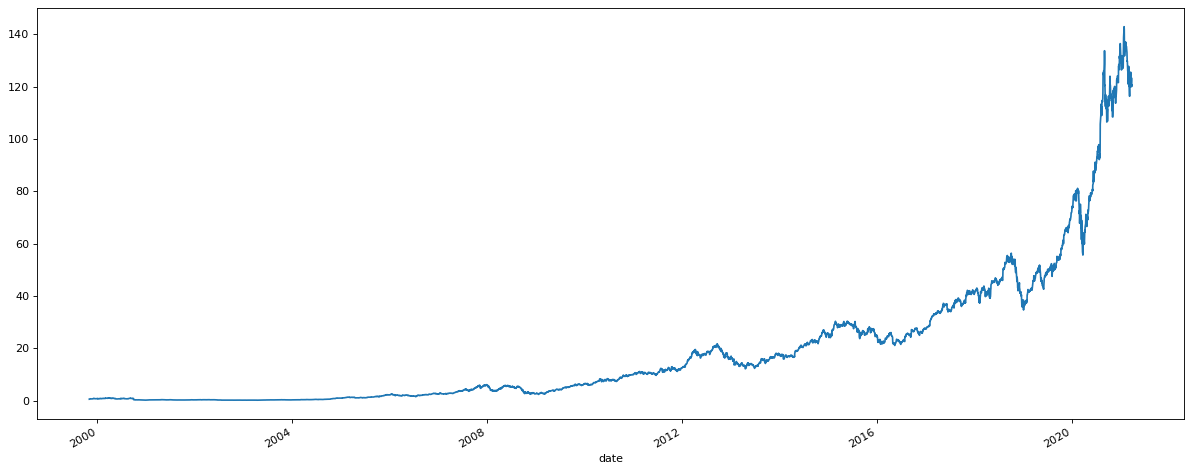

            1. open  2. high   3. low  4. close  5. adjusted close  \
date                                                                 
2021-03-25   119.54   121.66  119.000    120.59         120.590000   
2021-03-24   122.82   122.90  120.065    120.09         120.090000   
2021-03-23   123.33   124.24  122.140    122.54         122.540000   
2021-03-22   120.33   123.87  120.260    123.39         123.390000   
2021-03-19   119.90   121.43  119.675    119.99         119.990000   
...             ...      ...      ...       ...                ...   
1999-11-05    84.62    88.37   84.000     88.31           0.679082   
1999-11-04    82.06    85.37   80.620     83.62           0.643017   
1999-11-03    81.62    83.25   81.000     81.50           0.626715   
1999-11-02    78.00    81.69   77.310     80.25           0.617103   
1999-11-01    80.00    80.69   77.370     77.62           0.596879   

              6. volume  7. dividend amount  8. split coefficient  
date                 

In [81]:
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

key='GZZHIBO1SGTLPGB1'
ts = TimeSeries(key, output_format='pandas')
ti = TechIndicators(key)

aapl_data, aapl_meta_data = ts.get_daily_adjusted(symbol='AAPL',outputsize='full')
aapl_sma,aapl_metadata_sma = ti.get_sma(symbol='AAPL')

figure (num=None, figsize=(15,6), dpi=80)
aapl_data['5. adjusted close'].plot()
plt.tight_layout()
plt.grid
plt.show()
print(aapl_data)

In [38]:
aapl_time=aapl_data.loc[:'2009-01-02',];
aapl_dividend=aapl_time.drop(['1. open','2. high','3. low','4. close','5. adjusted close','6. volume'],1)
aapl_dividend.rename(columns={"7. dividend amount":"dividend","8. split coefficient":"split"},inplace=True)
indexNames = aapl_dividend[ (aapl_dividend['dividend'] == 0) & (aapl_dividend['split'] == 1.0) ].index
aapl_dividend.drop(indexNames , inplace=True)
aapl_dividend


,dividend,split
date,,
2021-02-05,0.205,1.000000
2020-11-06,0.205,1.000000
2020-08-31,0.000,4.000000
2020-08-07,0.820,1.000000
2020-05-08,0.820,1.000000
2020-02-07,0.770,1.000000
2019-11-07,0.770,1.000000
2019-08-09,0.770,1.000000
2019-05-10,0.770,1.000000


In [15]:

import requests
import pandas as pd

# get data from api
base_url = 'https://www.alphavantage.co/query?'
params = {'function': 'TIME_SERIES_DAILY','symbol': 'AAPL', 'apikey': 'GZZHIBO1SGTLPGB1'}
response = requests.get(base_url, params=params)

# convert text data in to a list of of list
data = [row.strip().split(',') for row in response.text.split('\n')]

# load data into a dataframe
#df = pd.DataFrame(data[1:-1][1:-1], columns=data[0])

# display(df)
data

[['{'],
 ['"Meta Data": {'],
 ['"1. Information": "Daily Prices (open',
  ' high',
  ' low',
  ' close) and Volumes"',
  ''],
 ['"2. Symbol": "AAPL"', ''],
 ['"3. Last Refreshed": "2021-03-24"', ''],
 ['"4. Output Size": "Compact"', ''],
 ['"5. Time Zone": "US/Eastern"'],
 ['}', ''],
 ['"Time Series (Daily)": {'],
 ['"2021-03-24": {'],
 ['"1. open": "122.8200"', ''],
 ['"2. high": "122.9000"', ''],
 ['"3. low": "120.0650"', ''],
 ['"4. close": "120.0900"', ''],
 ['"5. volume": "88530485"'],
 ['}', ''],
 ['"2021-03-23": {'],
 ['"1. open": "123.3300"', ''],
 ['"2. high": "124.2400"', ''],
 ['"3. low": "122.1400"', ''],
 ['"4. close": "122.5400"', ''],
 ['"5. volume": "95467142"'],
 ['}', ''],
 ['"2021-03-22": {'],
 ['"1. open": "120.3300"', ''],
 ['"2. high": "123.8700"', ''],
 ['"3. low": "120.2600"', ''],
 ['"4. close": "123.3900"', ''],
 ['"5. volume": "111912284"'],
 ['}', ''],
 ['"2021-03-19": {'],
 ['"1. open": "119.9000"', ''],
 ['"2. high": "121.4300"', ''],
 ['"3. low": "119.675

Text(0.5, 1.0, 'Fed interest from 2009-2021')

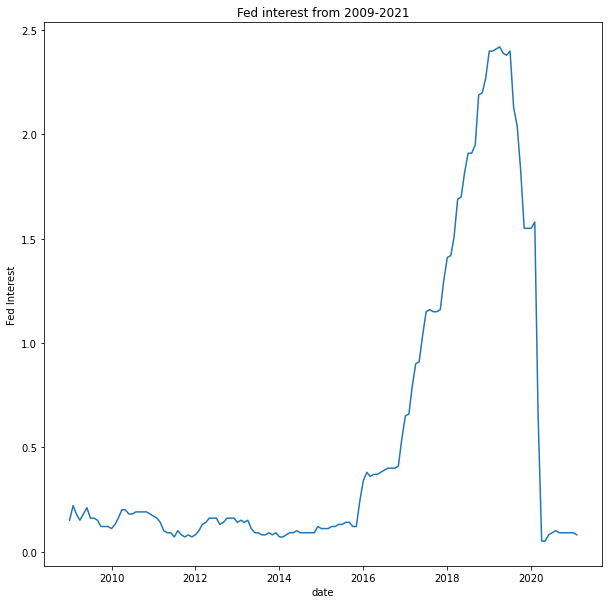

In [58]:
plt.figure(figsize=(10,10))
plt.plot(interest.index, interest['FEDFUNDS'])
plt.xlabel("date")
plt.ylabel("Fed Interest")
plt.title("Fed interest from 2009-2021")

Text(0.5, 1.0, 'dividends')

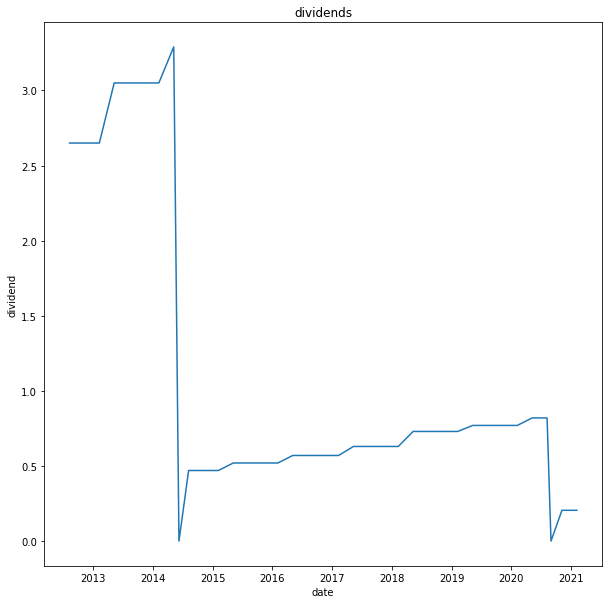

In [74]:
plt.figure(figsize=(10,10))
plt.plot(aapl_dividend.index, aapl_dividend['dividend'])

plt.xlabel("date")
plt.ylabel("dividend")
plt.title("dividends")